In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/review.gz', compression='gzip')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df1.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5.0,0.0,0.0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1.0,1.0,0.0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1.0,0.0,0.0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0.0,0.0,0.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0.0,0.0,0.0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [7]:
df1.columns

Index(['Unnamed: 0', 'review_id', 'user_id', 'business_id', 'stars', 'useful',
       'funny', 'cool', 'text', 'date'],
      dtype='object')

In [8]:
df1.shape

(8021124, 10)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8021124 entries, 0 to 8021123
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   object 
 1   review_id    object 
 2   user_id      object 
 3   business_id  object 
 4   stars        float64
 5   useful       float64
 6   funny        float64
 7   cool         float64
 8   text         object 
 9   date         object 
dtypes: float64(4), object(6)
memory usage: 612.0+ MB


In [10]:
df1.describe()

,stars,useful,funny,cool
count,8.021122e+06,8.021122e+06,8.021122e+06,8.021122e+06
mean,3.703575e+00,1.322882e+00,4.596423e-01,5.745620e-01
std,1.490486e+00,3.550831e+00,2.188143e+00,2.476906e+00
min,1.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,5.000000e+00,1.122000e+03,9.760000e+02,5.020000e+02


In [11]:
df1.corr()

,stars,useful,funny,cool
stars,1.000000,-0.088332,-0.041687,0.050560
useful,-0.088332,1.000000,0.669613,0.778529
funny,-0.041687,0.669613,1.000000,0.744910
cool,0.050560,0.778529,0.744910,1.000000


# **Missing Value Identification**

In [12]:
df1.isnull().sum()

Unnamed: 0     0
review_id      0
user_id        2
business_id    2
stars          2
useful         2
funny          2
cool           2
text           4
date           4
dtype: int64

In [13]:
df1 = df1.dropna()

# **Heat** **Map**

Text(0.5, 1.0, 'Heatmap')

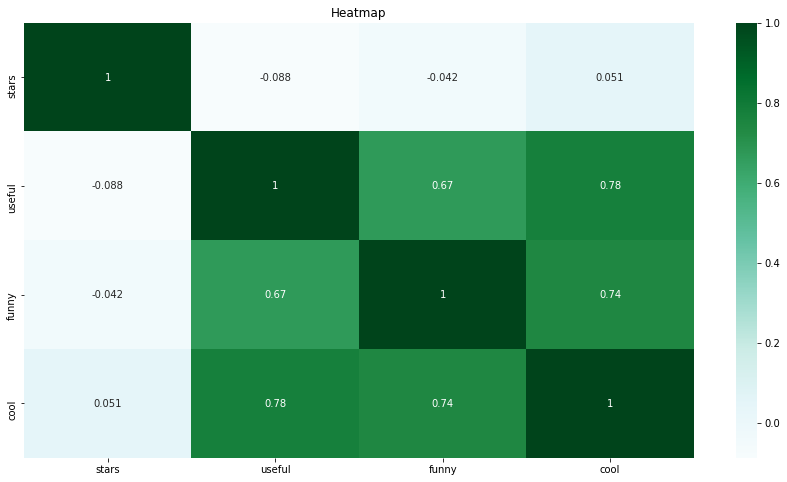

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(),cmap='BuGn',annot=True)
plt.title("Heatmap")

# **Text Length**

In [15]:
df1['text'] = df1['text'].astype(str)
df1['length'] = df1['text'].apply(len)
df1.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
0,0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5.0,0.0,0.0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16,1373
1,1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1.0,1.0,0.0,I am actually horrified this place is still in...,2013-12-07 03:16:52,1407
2,2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1.0,0.0,0.0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11,431
3,3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0.0,0.0,0.0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52,401
4,4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0.0,0.0,0.0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57,841


<Figure size 1800x1440 with 0 Axes>

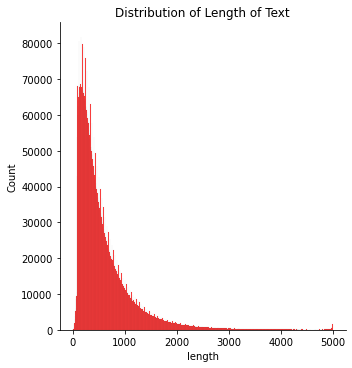

<Figure size 1800x1440 with 0 Axes>

In [16]:
sns.displot(df1, x="length",color="red")
plt.title("Distribution of Length of Text")
plt.figure(figsize=(25,20))

# **Text** **Cleaning** 

In [17]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df1["text"]= df1["text"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))

In [18]:
df1.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
0,0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5.0,0.0,0.0,"as someone worked many museums, i eager visit ...",2015-04-15 05:21:16,1373
1,1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1.0,1.0,0.0,i actually horrified place still business. my ...,2013-12-07 03:16:52,1407
2,2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1.0,0.0,0.0,i love deagan's. i do. i really do. the atmosp...,2015-12-05 03:18:11,431
3,3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0.0,0.0,0.0,"dismal, lukewarm, defrosted-tasting ""texmex"" g...",2011-05-27 05:30:52,401
4,4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0.0,0.0,0.0,"oh happy day, finally canes near casa. yes oth...",2017-01-14 21:56:57,841


In [19]:
df1['unique_words'] = df1['text'].apply(lambda x: len(set(str(x).split())))

In [20]:
df1.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length,unique_words
0,0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2.0,5.0,0.0,0.0,"as someone worked many museums, i eager visit ...",2015-04-15 05:21:16,1373,128
1,1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1.0,1.0,1.0,0.0,i actually horrified place still business. my ...,2013-12-07 03:16:52,1407,133
2,2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1.0,0.0,0.0,i love deagan's. i do. i really do. the atmosp...,2015-12-05 03:18:11,431,41
3,3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1.0,0.0,0.0,0.0,"dismal, lukewarm, defrosted-tasting ""texmex"" g...",2011-05-27 05:30:52,401,40
4,4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4.0,0.0,0.0,0.0,"oh happy day, finally canes near casa. yes oth...",2017-01-14 21:56:57,841,82


In [21]:
reviewurl = df1.loc[df1["text"].str.contains("http",na=False)]

In [22]:
print(f"Number of reviews with url: {len(reviewurl)}")


Number of reviews with url: 17139


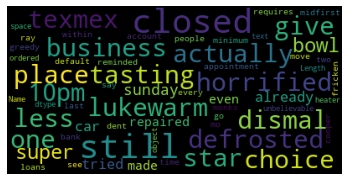

In [23]:
def word_cloud(data):
    wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(str(data))
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
word_cloud(df1["text"].loc[df1.stars == 1, ])
# Word Cloud for Star rating 1

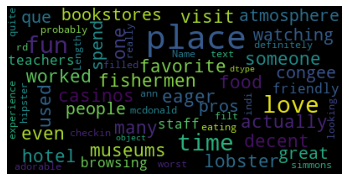

In [24]:
word_cloud(df1["text"].loc[df1.stars == 2, ])
#Word Cloud for Star rating 2

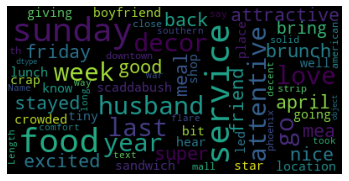

In [25]:
word_cloud(df1["text"].loc[df1.stars == 3, ])
#Word Cloud for Star rating 3

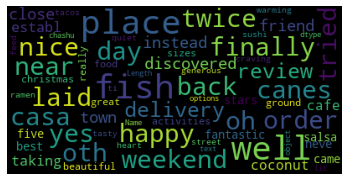

In [26]:
word_cloud(df1["text"].loc[df1.stars == 4, ])
#Word Cloud for Star rating 4

# **Exploratory Data Analysis**


**WORD** **CLOUD** **FOR** **REVIEWS** 

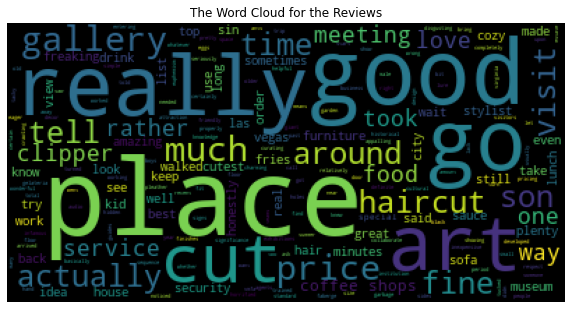

In [27]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = df1['text'].values 
wordcloud = WordCloud().generate(str(text))
plt.figure( figsize=(10,10 ))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("The Word Cloud for the Reviews")
plt.show()

In [28]:
df_business = pd.read_json('/content/drive/My Drive/Data files/business.json',lines=True)

In [29]:
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [30]:
df_business.shape

(209393, 14)

In [31]:
df_business.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      29045
categories        524
hours           44843
dtype: int64

In [32]:
df_business = df_business.dropna()

In [33]:
df_business=df_business[df_business['categories'].str.contains('Restaurants')]
df_business.is_copy=False
df_business['Cuisine']=pd.Series()
df_business.loc[df_business.categories.str.contains('American'),'Cuisine'] = 'American'
df_business.loc[df_business.categories.str.contains('Mexican'), 'Cuisine'] = 'Mexican'
df_business.loc[df_business.categories.str.contains('Italian'), 'Cuisine'] = 'Italian'
df_business.loc[df_business.categories.str.contains('Japanese'), 'Cuisine'] = 'Japanese'
df_business.loc[df_business.categories.str.contains('Chinese'), 'Cuisine'] = 'Chinese'
df_business.loc[df_business.categories.str.contains('Thai'), 'Cuisine'] = 'Thai'
df_business.loc[df_business.categories.str.contains('Mediterranean'), 'Cuisine'] = 'Mediterranean'
df_business.loc[df_business.categories.str.contains('French'), 'Cuisine'] = 'French'
df_business.loc[df_business.categories.str.contains('Vietnamese'), 'Cuisine'] = 'Vietnamese'
df_business.loc[df_business.categories.str.contains('Greek'),'Cuisine'] = 'Greek'
df_business.loc[df_business.categories.str.contains('Indian'),'Cuisine'] = 'Indian'
df_business.loc[df_business.categories.str.contains('Korean'),'Cuisine'] = 'Korean'
df_business.loc[df_business.categories.str.contains('Hawaiian'),'Cuisine'] = 'Hawaiian'
df_business.loc[df_business.categories.str.contains('African'),'Cuisine'] = 'African'
df_business.loc[df_business.categories.str.contains('Spanish'),'Cuisine'] = 'Spanish'
df_business.loc[df_business.categories.str.contains('Middle Eastern'),'Cuisine'] = 'Middle_eastern'
df_business.Cuisine[:20]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


8                 NaN
24                NaN
30     Middle_eastern
33                NaN
41         Vietnamese
42           American
44            Mexican
49                NaN
54                NaN
61           American
63                NaN
73         Vietnamese
82             Indian
83           American
86                NaN
89               Thai
90            Italian
94            Mexican
97                NaN
102               NaN
Name: Cuisine, dtype: object

In [34]:
df_business['Cuisine'] = df_business['Cuisine'].replace(np.nan, 'Mix')

In [35]:
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Cuisine
8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14...",Mix
24,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Cheesesteaks, Poutineries","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",Mix
30,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,43.947011,-79.454862,3.0,3,1,"{'Ambience': '{'touristy': False, 'hipster': F...","Persian/Iranian, Turkish, Middle Eastern, Rest...","{'Tuesday': '12:0-21:0', 'Wednesday': '12:0-21...",Middle_eastern
33,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Food, Pretzels, Bakeries, Fast Food, Restaurants","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",Mix
41,98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': '{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",Vietnamese


In [36]:
 Cuisine_list = df_business['Cuisine'].value_counts()

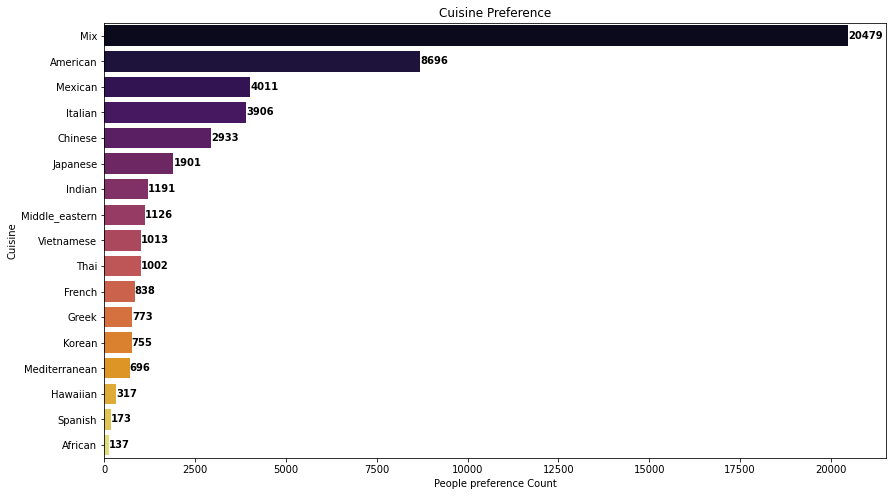

In [37]:
plt.figure(figsize=(14,8))
sns.countplot(y ='Cuisine', data = df_business, palette = "inferno",order = Cuisine_list.index)
for  i, v in enumerate(df_business.Cuisine.value_counts()):
    plt.text(v, i+0.1, str(v), fontweight='bold', fontsize=10)
plt.xlabel("People preference Count")
plt.title("Cuisine Preference")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


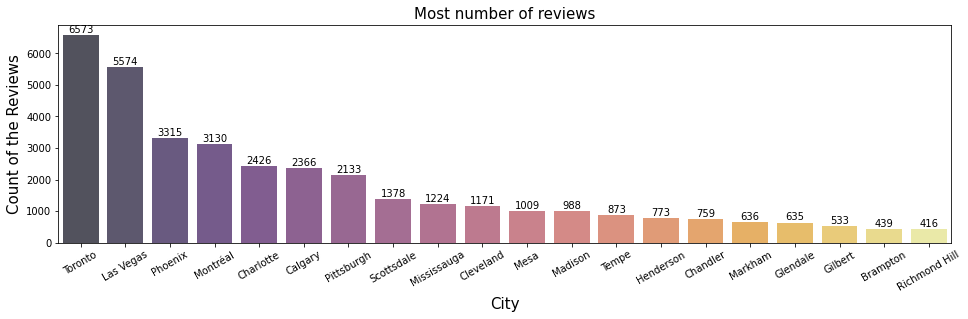

In [38]:
city=df_business['city'].value_counts()
city=city.sort_values(ascending=False)
city=city.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(city.index, city.values,palette = "inferno",alpha=0.7,)
plt.title("Most number of reviews",fontsize = 15)
locs, labels = plt.xticks()
plt.setp(labels,rotation = 30)
plt.ylabel('Count of the Reviews', fontsize=15)
plt.xlabel('City', fontsize=15)

rects = ax.patches
labels = city.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


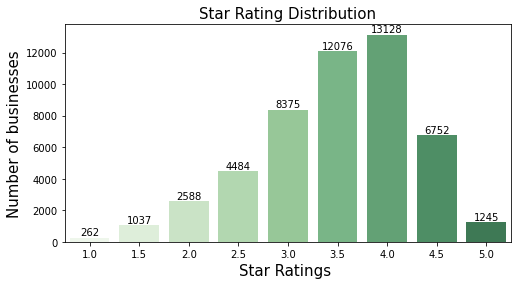

In [39]:
stars=df_business['stars'].value_counts()
stars=stars.sort_index()

plt.figure(figsize=(8,4))
ax= sns.barplot(stars.index, stars.values, alpha=0.8,palette='Greens')
plt.title("Star Rating Distribution",fontsize=15)
plt.ylabel('Number of businesses', fontsize=15)
plt.xlabel('Star Ratings ', fontsize=15)


rects = ax.patches
labels = stars.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Variation ')

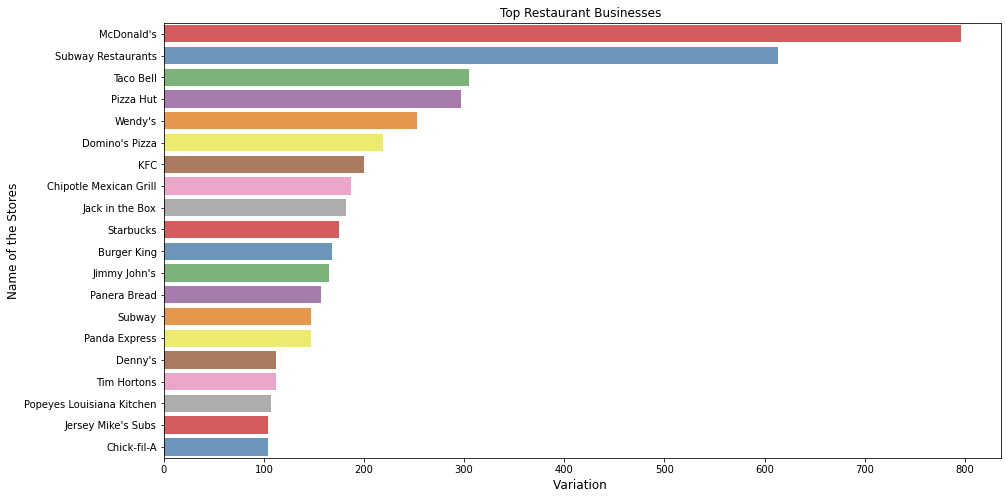

In [40]:
plt.figure(figsize=(15,8))
cnt = df_business['name'].value_counts()[:20].to_frame()
sns.barplot(cnt['name'], cnt.index, palette = "Set1",alpha = 0.8)
plt.title("Top Restaurant Businesses ",fontsize=12)
plt.ylabel('Name of the Stores', fontsize=12)
plt.xlabel('Variation ', fontsize=12)

In [41]:
df_business.name.value_counts().index[:20].tolist()

["McDonald's",
 'Subway Restaurants',
 'Taco Bell',
 'Pizza Hut',
 "Wendy's",
 "Domino's Pizza",
 'KFC',
 'Chipotle Mexican Grill',
 'Jack in the Box',
 'Starbucks',
 'Burger King',
 "Jimmy John's",
 'Panera Bread',
 'Subway',
 'Panda Express',
 "Denny's",
 'Tim Hortons',
 'Popeyes Louisiana Kitchen',
 "Jersey Mike's Subs",
 'Chick-fil-A']

In [42]:
state_count = pd.DataFrame(df_business['state'].value_counts()[:20])

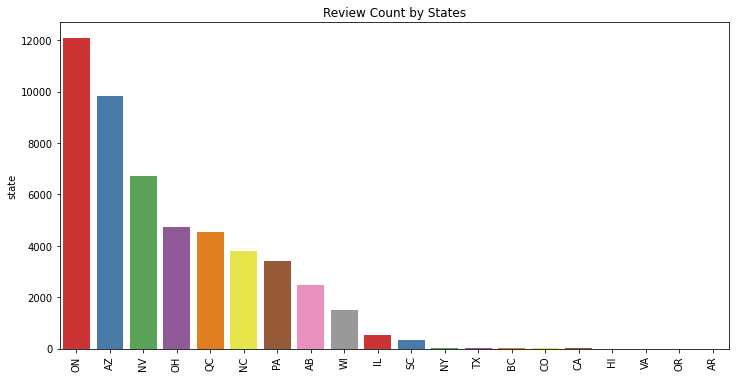

In [43]:
plt.figure(figsize=(12,6))
g = sns.barplot(x=state_count.index, y=state_count['state'], palette = 'Set1')
plt.title('Review Count by States');
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.show()

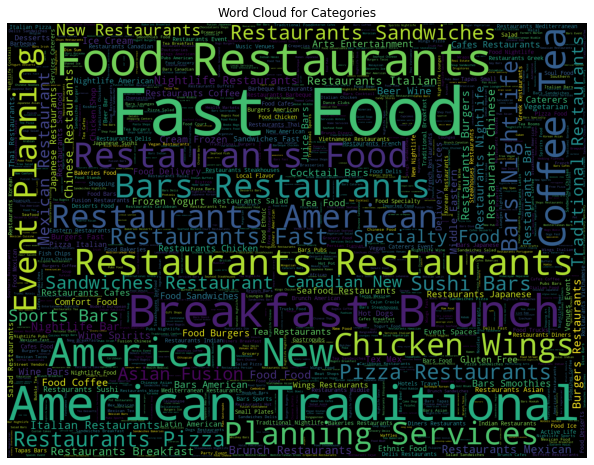

In [44]:
cloud = WordCloud(width=1440, height= 1080,max_words= 1000).generate(' '.join(df_business['categories'].astype(str)))
plt.figure(figsize=(12, 8))
plt.imshow(cloud)
plt.title("Word Cloud for Categories",fontsize=12)
plt.axis('off');

In [45]:
df_checkin = pd.read_json('/content/drive/My Drive/Data files/checkin.json',lines=True)

In [46]:
df_checkin

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."
...,...,...
175182,zzvlwkcNR1CCqOPXwuvz2A,"2017-05-06 20:05:15, 2017-05-12 22:37:03, 2017..."
175183,zzwaS0xn1MVEPEf0hNLjew,"2010-02-16 02:09:56, 2010-07-05 05:40:48, 2010..."
175184,zzwhN7x37nyjP0ZM8oiHmw,"2016-03-06 13:27:02, 2016-03-09 00:41:53, 2016..."
175185,zzwicjPC9g246MK2M1ZFBA,"2012-09-22 00:26:15, 2012-09-23 20:12:00, 2012..."


In [47]:
df_checkin.shape

(175187, 2)

In [48]:
df_tip = pd.read_json('/content/drive/My Drive/Data files/tip.json',lines=True)

In [49]:
df_tip

,user_id,business_id,text,date,compliment_count
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0
...,...,...,...,...,...
1320756,ayaRhAPJxrP-AQq6KeiBhg,ImkAc07Pppz0D3KC4iBTng,I love this place,2019-05-03 23:53:17,0
1320757,PWX9qW1zOXKyILZAtP8OTQ,nizlIF4pl2_6zZkFITBApA,"Amazing cookies, great staff, great delivery! ...",2019-05-02 00:09:01,0
1320758,99L0bntmbChEwShH440C2Q,10jP6njt3elD90gaHF1FBQ,Just perfect. Had this ice cream 3 times in 1 ...,2019-08-05 01:53:37,0
1320759,I8DpwNemLrFnAuCAYmu_sw,gA9hCYY7MYl9oZ3aym5dvw,Orgasm rolls are on point!!!,2019-03-29 23:36:01,0


In [50]:
df_tip.shape

(1320761, 5)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Tips')

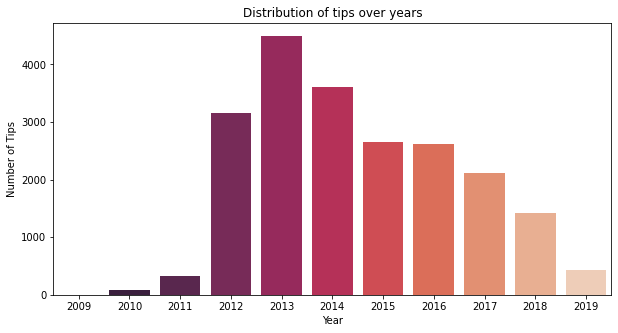

In [51]:
# Distribution of Tips by Year

df_tip['date'] = pd.to_datetime(df_tip['date'])
df_tip['Year'] = df_tip['date'].dt.year
df_tip['Month'] = df_tip['date'].dt.month

f,ax = plt.subplots(figsize = (10,5))
tips  = df_tip.groupby('Year').sum()['compliment_count'].to_frame()
sns.barplot(tips.index,tips['compliment_count'],palette='rocket')
ax.set_title('Distribution of tips over years')
ax.set_ylabel('Number of Tips')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Tips')

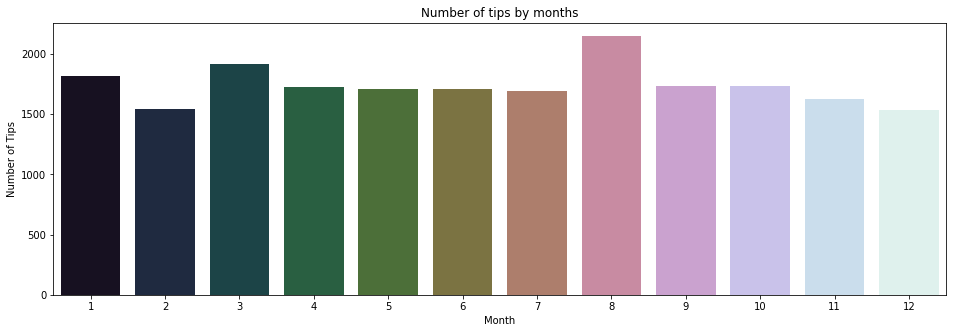

In [52]:
# Number of Tips by Months

f,ax1 = plt.subplots(figsize = (16,5))

tip  = df_tip.groupby('Month').sum()['compliment_count'].to_frame()
sns.barplot(tip.index,tip['compliment_count'],palette='cubehelix')
ax1.set_title('Number of tips by months')
ax1.set_ylabel('Number of Tips')



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Stars')

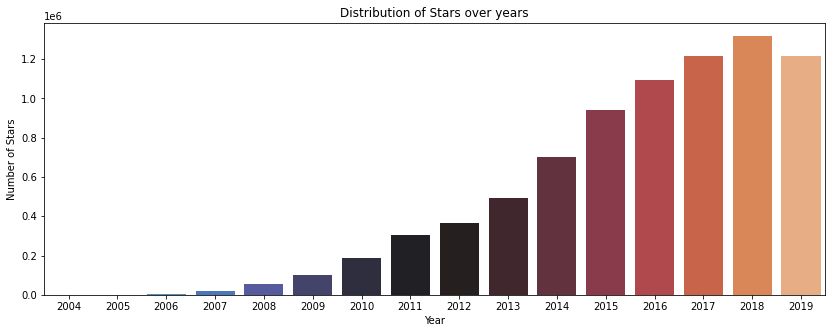

In [53]:
# Distribution of Stars by Year

df1['date'] = pd.to_datetime(df1['date'])
df1['Year'] = df1['date'].dt.year
df1['Month'] = df1['date'].dt.month

f,ax2 = plt.subplots(figsize = (14,5))
stars = df1.groupby('Year').count()['stars'].to_frame()
sns.barplot(stars.index, stars['stars'],palette = 'icefire')
ax2.set_title('Distribution of Stars over years')
ax2.set_ylabel('Number of Stars')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Stars')

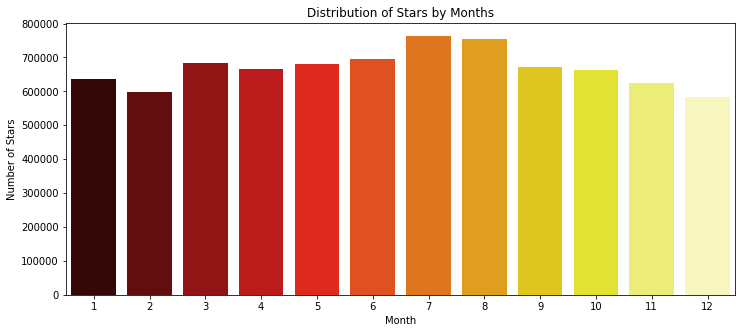

In [54]:
# Distribution of Stars by Months

f,ax3 = plt.subplots(figsize = (12,5))
star = df1.groupby('Month').count()['stars'].to_frame()
sns.barplot(star.index, star['stars'],palette = 'hot')
ax3.set_title('Distribution of Stars by Months')
ax3.set_ylabel('Number of Stars')

# **Data Models and Performance**


In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [56]:
#Too much data have to sample
sampled_df1 = df1.sample(n = 1000, random_state=23)
sampled_df1.shape

(1000, 14)

In [57]:
sampled_df1.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length,unique_words,Year,Month
795368,795368,GFemitau3qjP_j43qXN1vQ,v2WrKPkRI1TikXDKAi8VFw,DncyhhT6-T-_g961pbEftA,3.0,0.0,0.0,1.0,i fly swa almost exclusive since started servi...,2016-11-10 16:37:48,706,68,2016,11
5677003,5677001,chNsHHSycETUzbroagtlsA,eCvcvojhlKXeoFDJVpeezw,f5O7v_X_jCg2itqacRfxhg,5.0,0.0,0.0,0.0,this place definitely tasty ramen! i came arou...,2017-08-17 04:16:59,395,40,2017,8
106894,106894,oGLgGxGaxTVpieAgLpqMYg,lUwlSqU_s4bo_IMJew03pw,LpJvitnw7vU5UW-3KE9kjA,5.0,2.0,2.0,2.0,go go go. an island quality. in vegas. not fei...,2010-07-20 18:50:53,746,72,2010,7
2622368,2622366,z6IgDZdggdCYeWGkT9S4LA,BIjVpTV1xSlULyFBRB_5xg,NEYMAeK1BeR2E_vELnEIDA,5.0,0.0,0.0,0.0,best coffee shop king. why? espresso complex c...,2016-02-05 13:50:13,580,54,2016,2
3463892,3463890,CFI_meIbUnIL4XqksPBHzw,EC6tNwA1kac7X7Zxb4ZXUQ,dWFUKB_HPBIE87AFBHEb_w,1.0,0.0,2.0,0.0,spirit cancelled flight i way airport. screw s...,2017-08-04 07:13:17,224,21,2017,8


In [58]:
# Set the Target by the 5 Stars Rating
classes = sampled_df1[(sampled_df1['stars']==1) | (sampled_df1['stars']==2)| (sampled_df1['stars']==3) | (sampled_df1['stars']==4) | (sampled_df1['stars']==5)]
classes.head()
print(classes.shape)

# Seperate the dataset into X and Y for prediction
x = classes['text']
y = classes['stars']
print(x.head())
print(y.head())

(1000, 14)
795368     i fly swa almost exclusive since started servi...
5677003    this place definitely tasty ramen! i came arou...
106894     go go go. an island quality. in vegas. not fei...
2622368    best coffee shop king. why? espresso complex c...
3463892    spirit cancelled flight i way airport. screw s...
Name: text, dtype: object
795368     3.0
5677003    5.0
106894     5.0
2622368    5.0
3463892    1.0
Name: stars, dtype: float64


In [59]:
# Process Text (Review) Data for Vectorization
def clean_text(text):
  
    cln = [word for word in text if word not in string.punctuation]
    cln = ''.join(cln)
    return [word.lower() for word in cln.split() if word.lower() not in stopwords.words('english')]

sampled_df1["text"] = sampled_df1["text"].apply(clean_text)
sampled_df1.count()

Unnamed: 0      1000
review_id       1000
user_id         1000
business_id     1000
stars           1000
useful          1000
funny           1000
cool            1000
text            1000
date            1000
length          1000
unique_words    1000
Year            1000
Month           1000
dtype: int64

In [60]:
# Vectorization (converting words into a vector) then apply to all Reviews
vocab = CountVectorizer(analyzer=clean_text).fit(x)
x = vocab.transform(x)

In [61]:
# Splitting the dataset X into training and testing set:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=101)

### **Support Vector Machine**

In [62]:
# Modelling:
# Train a SVM model by tunning both C and gamma, report the best parameters
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train.values.ravel())
svc_pred = svc.predict(x_test)

# Performance Report
print("Confusion Matrix for Support Vector Machine:")
print(confusion_matrix(y_test,svc_pred))
print("Score:",round(accuracy_score(y_test,svc_pred)*100,2))
print("Classification Report:")
print(classification_report(y_test,svc_pred))

Confusion Matrix for Support Vector Machine:
[[10  0  0  1 23]
 [ 3  0  0  1 11]
 [ 3  0  0  1 13]
 [ 4  0  0  4 31]
 [ 2  0  0  2 91]]
Score: 52.5
Classification Report:
              precision    recall  f1-score   support

         1.0       0.45      0.29      0.36        34
         2.0       0.00      0.00      0.00        15
         3.0       0.00      0.00      0.00        17
         4.0       0.44      0.10      0.17        39
         5.0       0.54      0.96      0.69        95

    accuracy                           0.53       200
   macro avg       0.29      0.27      0.24       200
weighted avg       0.42      0.53      0.42       200



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


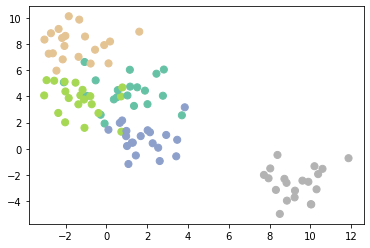

In [63]:
# Visualize our SVM
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=100, centers=5,
                  random_state=0, cluster_std=1.2)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='Set2');

### **Decision Tree & Random Forest**

In [64]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#this how to tune parameters
opt_tree = DecisionTreeClassifier(random_state = 0)   
param_DT = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,10)}

grid_tree = GridSearchCV(opt_tree,param_DT,cv=5)
grid_tree.fit(x_train,y_train)
tree_pred = grid_tree.predict(x_test)

# Performance Report
print("Confusion Matrix for Decision Tree Model:")
print(confusion_matrix(y_test,tree_pred))
print("Score:",round(accuracy_score(y_test,tree_pred)*100,2))
print("Classification Report:")
print(classification_report(y_test,tree_pred))

Confusion Matrix for Decision Tree Model:
[[ 7  0  0  6 21]
 [ 0  0  0  7  8]
 [ 0  0  2  8  7]
 [ 2  0  0 10 27]
 [ 1  0  1 11 82]]
Score: 50.5
Classification Report:
              precision    recall  f1-score   support

         1.0       0.70      0.21      0.32        34
         2.0       0.00      0.00      0.00        15
         3.0       0.67      0.12      0.20        17
         4.0       0.24      0.26      0.25        39
         5.0       0.57      0.86      0.68        95

    accuracy                           0.51       200
   macro avg       0.43      0.29      0.29       200
weighted avg       0.49      0.51      0.44       200



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


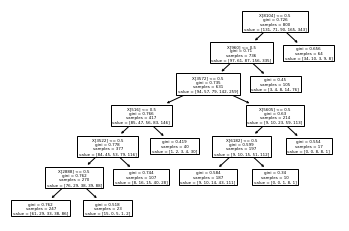

In [65]:
# Visualize Tree
from sklearn import tree
tree.plot_tree(grid_tree.best_estimator_);

In [66]:
# Random Forest using parameter from Decision Tree
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=0)
param_grid = { 
    'n_estimators': [5,10,100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}
rfc_cv= GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
rfc_cv.fit(x_train, y_train)
print('The Best parameters for the Random Forest', rfc_cv.best_params_)
rnd_tree = RandomForestClassifier(n_estimators=5, max_depth = 5,max_leaf_nodes = 2, min_samples_split = 2)
rnd_tree.fit(x_train,y_train)
forest_pred = rfc_cv.predict(x_test)

# Performance Report
print("Confusion Matrix for Random Forest Model:")
print(confusion_matrix(y_test,forest_pred))
print("Score:",round(accuracy_score(y_test,forest_pred)*100,2))
print("Classification Report:")
print(classification_report(y_test,forest_pred))

The Best parameters for the Random Forest {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 5}
Confusion Matrix for Random Forest Model:
[[ 4  1  0  0 29]
 [ 0  0  0  0 15]
 [ 0  0  0  0 17]
 [ 1  0  0  1 37]
 [ 0  0  0  1 94]]
Score: 49.5
Classification Report:
              precision    recall  f1-score   support

         1.0       0.80      0.12      0.21        34
         2.0       0.00      0.00      0.00        15
         3.0       0.00      0.00      0.00        17
         4.0       0.50      0.03      0.05        39
         5.0       0.49      0.99      0.66        95

    accuracy                           0.49       200
   macro avg       0.36      0.23      0.18       200
weighted avg       0.47      0.49      0.36       200



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


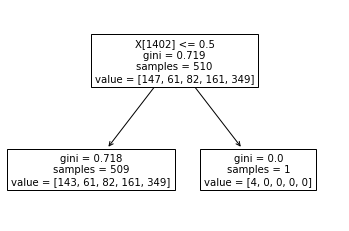

In [67]:
# Visualize a tree (estimator) in our Random Forest
from sklearn import tree

tree.plot_tree(rnd_tree.estimators_[1]); # Tree no. 1

In [68]:
# MULTILAYER PERCEPTRON CLASSIFIER
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(x_train,y_train)
mlp_pred = mlp.predict(x_test)

# Performance Report
print("Confusion Matrix for Multilayer Perceptron Classifier:")
print(confusion_matrix(y_test,mlp_pred))
print("Score:",round(accuracy_score(y_test,mlp_pred)*100,2))
print("Classification Report:")
print(classification_report(y_test,mlp_pred))

Confusion Matrix for Multilayer Perceptron Classifier:
[[22  0  1  5  6]
 [ 4  1  3  2  5]
 [ 1  0  1  5 10]
 [ 1  0  4 13 21]
 [ 2  1  1 17 74]]
Score: 55.5
Classification Report:
              precision    recall  f1-score   support

         1.0       0.73      0.65      0.69        34
         2.0       0.50      0.07      0.12        15
         3.0       0.10      0.06      0.07        17
         4.0       0.31      0.33      0.32        39
         5.0       0.64      0.78      0.70        95

    accuracy                           0.56       200
   macro avg       0.46      0.38      0.38       200
weighted avg       0.53      0.56      0.53       200



### **Show off Model Performance via Example:**

In [69]:
# POSITIVE REVIEW
ex1 = df1['text'][106894]
print(ex1)
print("Actual Rating: ",sampled_df1['stars'][106894])
ex1_t = vocab.transform([ex1])
print("Predicted Rating:")
mlp.predict(ex1_t)[0]

go go go. an island quality. in vegas. not feigned quality: quality. 1. fantastic chocolate. go truffles. you get chocolate bars places easily. plus, really innovative. 2. intelligentia coffee. did everybody hear that? intelligentia coffee. that really goes prove place consistent comes quality virtual oasis coffee desert vegas truly is. 3. hugely nice helpful staff. again, neatly aligned chocolate coffee. finally ultimate perk: wifi outlets! these come cheap vegas. (caveat: tiny tables. tall chairs. spend short period time. i've learned greedy)
Actual Rating:  5.0
Predicted Rating:


5.0

In [70]:
# NEGATIVE REVIEW
ex2 = df1['text'][3463892]
print(ex2)
print("Actual Rating: ",sampled_df1['stars'][3463892])
ex2_t = vocab.transform([ex2])
print("Predicted Rating:")
mlp.predict(ex2_t)[0]

spirit cancelled flight i way airport. screw spirit! i'm never flying again. spend little go airlines reputable. also spirit nickels dimes everything
Actual Rating:  1.0
Predicted Rating:


1.0

# **Recommendation Application for Restaurant Only**



This recommender will use Categories, Reviews, Stars and Location to make decision

In [71]:
# Location data is in a different data table
df_business = pd.read_json('/content/drive/My Drive/Data files/business.json',lines=True)
df_business.isnull().sum()
df_business = df_business.dropna()
df_business.head()
df_business.shape

(146796, 14)

In [72]:
# Choose only restaurants
df2 = df_business[df_business['categories'].str.contains('Restaurants')]
print('Final Shape: ',df2.shape)

Final Shape:  (49947, 14)


In [73]:
# Join Reviews and Categories
df_yelp_review_iter = pd.read_csv('/content/drive/My Drive/review.gz', compression='gzip', chunksize = 100000)
df_yelp_review = pd.DataFrame()
i=0
for df in df_yelp_review_iter:
    df = df[df['business_id'].isin(df2['business_id'])]
    df_yelp_review = pd.concat([df_yelp_review, df])
    i=i+1
    print(i)
    if i==4: break

1
2
3
4


In [74]:
# Make sure we matched the same business from both tables
df2 = df2[df2['business_id'].isin(df_yelp_review['business_id'])]
df2.head

<bound method NDFrame.head of                   business_id  ...                                              hours
8      pQeaRpvuhoEqudo3uymHIQ  ...  {'Monday': '11:30-14:30', 'Tuesday': '11:30-14...
33     vjTVxnsQEZ34XjYNS-XUpA  ...  {'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...
42     fhNf_sg-XzZ3e7HEVGuOZg  ...  {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...
44     Ga2Bt7xfqoggTypWD5VpoQ  ...  {'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...
49     tLpkSwdtqqoXwU0JAGnApw  ...  {'Monday': '10:0-3:0', 'Tuesday': '10:0-3:0', ...
...                       ...  ...                                                ...
20905  YHCseOJ93wJh0gBcii_2qA  ...  {'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ...
20912  TJt1W9haRm2DKuoZLQ69yA  ...  {'Monday': '11:0-22:30', 'Tuesday': '11:0-22:3...
20916  gp_bu7Ah81qaBY3M0Leffw  ...  {'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...
20928  zV38gkkEeJ4cVRlSWWQTfQ  ...  {'Monday': '10:0-21:0', 'Tuesday': '10:0-22:0'...
20936  H1j34TgbrVZkxeww9

In [75]:
df_yelp_review['text']

2         I love Deagan's. I do. I really do. The atmosp...
3         Dismal, lukewarm, defrosted-tasting "TexMex" g...
4         Oh happy day, finally have a Canes near my cas...
5         This is definitely my favorite fast food sub s...
6         Really good place with simple decor, amazing f...
                                ...                        
399993    Without a doubt, the best meal, staff and atmo...
399995    This place puts taste and flavors together ver...
399997    For my Dad's birthday he wanted Chicken and Wa...
399998    Andrew was the best server! Made our experienc...
399999    We are definitely breakfast people but always ...
Name: text, Length: 252923, dtype: object

In [76]:
# We will this function to process and clean our Review Data
import re

def clean_text(text):
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)
    
    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)    
    return text


In [77]:
df_yelp_review['text'] = df_yelp_review['text'].apply(clean_text)


In [78]:
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

#Vectorize reviews
vectorizer_reviews = CountVectorizer(min_df = .01,max_df = .99, tokenizer = WordPunctTokenizer().tokenize)
vectorized_reviews = vectorizer_reviews.fit_transform(df_yelp_review['text'])

In [79]:
#Vectorize categories
vectorizer_categories = CountVectorizer(min_df = 1, max_df = 1., tokenizer = lambda x: x.split(', '))
vectorized_categories = vectorizer_categories.fit_transform(df2['categories'])

#Categories Vectors Shape: 
print(vectorized_reviews.shape)
print(vectorized_categories.shape)

(252923, 911)
(4447, 397)


In [80]:
def bot():
   #Welcome statement and ask for input
    print (" ")
    print("Welcome to Similar Restaurant Recommender Bot!")
    business_choose = input("Find similar restaurants to (Please Enter Biz_ID) _____")
    a = df2[df2['business_id'] == business_choose]

    from scipy import sparse
    businessxreview = sparse.csr_matrix(pd.get_dummies(df_yelp_review['business_id']).values)
  
    new_reviews = df_yelp_review.loc[df_yelp_review['business_id'] == business_choose, 'text']
    new_categories = df2.loc[df2['business_id'] == business_choose, 'categories']

    from scipy.spatial.distance import cdist
    # find most similar reviews
    dists1 = cdist(vectorizer_reviews.transform(new_reviews).todense().mean(axis=0), 
                vectorized_reviews.T.dot(businessxreview).T.todense(), 
                metric='correlation')

    # find most similar categories
    dists2 = cdist(vectorizer_categories.transform(new_categories).todense().mean(axis=0), 
                vectorized_categories.todense(), 
                metric='correlation')
    
    # combine the two vectors in one matrix
    dists_together = np.vstack([dists1.ravel(), dists2.ravel()]).T
    dists = dists_together.mean(axis=1)

    # select the closest 10
    closest = dists.argsort().ravel()[:10]
    output = df2.loc[df2['business_id'].isin(df2['business_id'].iloc[closest]), ['business_id', 'categories', 'name', 'stars', 'city', 'state']]
    
    # Print Results:
    print('')
    print('******','Top 3 Similar Restaurants to Business_id', business_choose,'******')
    print('')
    print(' 1. ')
    print(output.iloc[0][['name', 'stars', 'city', 'state']])
    print('')
    print(' 2. ')
    print(output.iloc[1][['name', 'stars', 'city', 'state']])
    print('')
    print(' 3. ')
    print(output.iloc[2][['name', 'stars', 'city', 'state']])



In [81]:
# Use this business_id as an example: tLpkSwdtqqoXwU0JAGnApw    
# Notice that all result we got are fast foods restaurant
# This means that our Recommnender has learned the common features among these places
bot()


 
Welcome to Similar Restaurant Recommender Bot!
Find similar restaurants to (Please Enter Biz_ID) _____tLpkSwdtqqoXwU0JAGnApw 


/usr/local/lib/python3.6/dist-packages/numpy/matrixlib/defmatrix.py:447: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/matrixlib/defmatrix.py:447: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)



****** Top 3 Similar Restaurants to Business_id tLpkSwdtqqoXwU0JAGnApw  ******

 1. 
name     The Empanadas House
stars                    4.5
city               Champaign
state                     IL
Name: 8, dtype: object

 2. 
name     Ken Sushi
stars            4
city      Montréal
state           QC
Name: 13944, dtype: object

 3. 
name     Guru Lukshmi
stars             4.5
city      Mississauga
state              ON
Name: 13946, dtype: object
